In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
#percent of null values in train
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### Imputing Null values

In [5]:
#For numerical feature, impute with median value
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].median())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].median())

In [6]:
#For categorical feature, impute with mode value
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [7]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### Fixing irregularities in 'Item_Fat_Content' feature

In [9]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

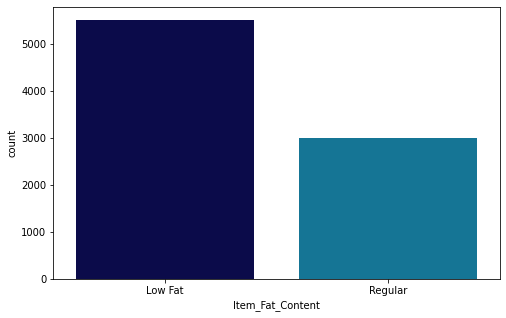

In [10]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

#### Only 2 categories exist now, as all other same name categories with different fonts have been replaced

#### Years of operation of store

In [11]:
train['Years_operation'] = 2021 - train['Outlet_Establishment_Year']
test['Years_operation'] = 2021 - test['Outlet_Establishment_Year']

#### Creating category for type of item from "Item_Identifier" feature

In [12]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_operation
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [13]:
#Slicing the first two letters of Item_Identifier feature as that represent Item types
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])

In [14]:
train['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

In [15]:
#Mapping the symbols to meaningful food items
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [16]:
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [17]:
#Same transformation for test dataset
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

#### Modify categories of 'Item_Fat_Content' based on 'Item_Type_Combined' feature

In [18]:
# Mark 'Non-Consumable' items as 'Non-Edible' in Item_Fat_Content, thus creating a new category in the feature
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

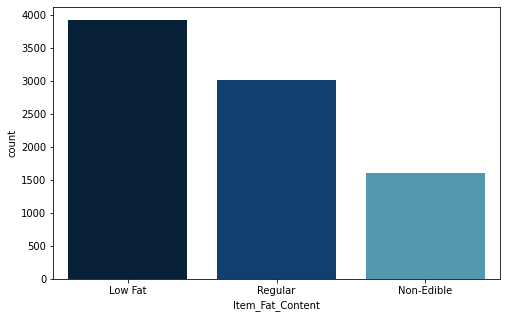

In [19]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

In [20]:
# Similar for test dataset
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [21]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_operation,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,Non-Consumable


#### Encoding the categorical features from training and test dataset

In [22]:
#List of Categorical features
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']
train[categorical_features].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,NCD19,Non-Edible,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable


In [23]:
encode = LabelEncoder()
#New variable for outlet
train['Outlet'] = encode.fit_transform(train['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

for i in var_mod:
    train[i] = encode.fit_transform(train[i])
    
#One Hot Coding:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'], drop_first=True)

In [24]:
pd.set_option('display.max_columns',None)
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Years_operation,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,22,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,12,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,22,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,23,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,34,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [25]:
#Similar for test set
test['Outlet'] = encode.fit_transform(test['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

for i in var_mod:
    test[i] = encode.fit_transform(test[i])
    
#One Hot Coding:
test = pd.get_dummies(test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'], drop_first=True)

In [26]:
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [27]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Years_operation,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,1999,3735.1380,22,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2009,443.4228,12,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1999,2097.2700,22,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,1998,732.3800,23,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,34,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


#### Feature Scaling 

In [28]:
scaling_features = [feature for feature in train.columns if feature not in ['Item_Outlet_Sales']]
len(scaling_features)

25

In [29]:
scaler = MinMaxScaler()
scaler.fit_transform(train[scaling_features])

array([[0.28252456, 0.04886645, 0.92750715, ..., 0.        , 0.        ,
        1.        ],
       [0.08127419, 0.05870508, 0.0720684 , ..., 0.        , 0.        ,
        0.        ],
       [0.77076511, 0.05103696, 0.46828841, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.35992855, 0.10714751, 0.22849221, ..., 0.        , 0.        ,
        0.        ],
       [0.15808276, 0.44221878, 0.30493925, ..., 0.        , 0.        ,
        0.        ],
       [0.61000298, 0.13666114, 0.18750976, ..., 0.        , 1.        ,
        0.        ]])

In [30]:
#Concat Id, Sale Price to the scaled data after transforming it from array to data frame
dataset = pd.concat([train[['Item_Outlet_Sales']].reset_index(drop=True),
                    pd.DataFrame(scaler.fit_transform(train[scaling_features]), columns=scaling_features)],
                    axis=1)

In [31]:
dataset.head()

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Years_operation,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,3735.1380,0.282525,0.048866,0.927507,0.583333,0.416667,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,443.4228,0.081274,0.058705,0.072068,1.000000,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2097.2700,0.770765,0.051037,0.468288,0.583333,0.416667,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,732.3800,0.871986,0.000000,0.640093,0.541667,0.458333,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,994.7052,0.260494,0.000000,0.095805,0.083333,0.916667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
dataset.shape

(8523, 26)

In [33]:
dataset.to_csv('X_train.csv',index=False)

In [34]:
dataset = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

In [35]:
dataset.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Years_operation,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.964275,0.023374,0.323413,0.583333,0.416667,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.222983,0.118737,0.235849,0.916667,0.083333,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.598095,0.307674,0.894140,0.541667,0.458333,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.164335,0.047548,0.524488,0.916667,0.083333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.473057,0.366458,0.862069,0.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
dataset.to_csv('X_test.csv',index=False)